In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, PercentFormatter
import requests
import os
from dotenv import load_dotenv
load_dotenv()

ALPHA_VANTAGE_KEY=os.environ.get('ALPHA_VANTAGE_KEY')

In [4]:
symbol = "AAPL"

In [5]:
url = f"https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={symbol}&apikey={ALPHA_VANTAGE_KEY}"
r = requests.get(url)
data = r.json()
data

{'symbol': 'AAPL',
 'annualReports': [{'fiscalDateEnding': '2023-09-30',
   'reportedCurrency': 'USD',
   'grossProfit': '169148000000',
   'totalRevenue': '379352000000',
   'costOfRevenue': '239069000000',
   'costofGoodsAndServicesSold': '214137000000',
   'operatingIncome': '114301000000',
   'sellingGeneralAndAdministrative': '24932000000',
   'researchAndDevelopment': '29915000000',
   'operatingExpenses': '54847000000',
   'investmentIncomeNet': '3750000000',
   'netInterestIncome': '-3933000000',
   'interestIncome': '183000000',
   'interestExpense': '3933000000',
   'nonInterestIncome': '383285000000',
   'otherNonOperatingIncome': '-382000000',
   'depreciation': '8500000000',
   'depreciationAndAmortization': '11519000000',
   'incomeBeforeTax': '113736000000',
   'incomeTaxExpense': '16741000000',
   'interestAndDebtExpense': '3933000000',
   'netIncomeFromContinuingOperations': '96995000000',
   'comprehensiveIncomeNetOfTax': '96652000000',
   'ebit': '117669000000',
   '

In [6]:
def income_statement_report(data, typeReport):
    selected_fields = ['fiscalDateEnding','nonInterestIncome', 'operatingIncome', 'netIncome']
    annualReports = []
    for report in data[typeReport]:
        non_interest_income = report['nonInterestIncome']
        if non_interest_income == 'None':
            non_interest_income = report['totalRevenue']
        annualReports.append({key: report[key] if key != 'nonInterestIncome' else non_interest_income for key in selected_fields})

    df = pd.json_normalize(annualReports)
    df['fiscalDateEnding'] = pd.to_datetime(df['fiscalDateEnding'])
    df.set_index('fiscalDateEnding', inplace=True)
    df = df.apply(pd.to_numeric)
    df.sort_index(ascending=True, inplace=True)
    df['revenueYOYGrowth'] = df['nonInterestIncome'].pct_change()
    df['operatingIncomeAs%OfRevenue'] = df['operatingIncome']/df['nonInterestIncome']
    
    if typeReport == 'annualReports':
        df = df.tail(10)
        df.index = df.index.year
    else:
        df = df.tail(20)
        df.index = df.index.to_period('Q')
    
    return df

In [7]:
annualReports = income_statement_report(data, 'annualReports')
quarterlyReports = income_statement_report(data, 'quarterlyReports')

In [8]:
def plot_report(data, fieldReport, nameReport):
    ax = data[fieldReport].plot.bar(figsize=(16,6), zorder=3)
    ax.grid(zorder=0)
    ax.legend(labels=[nameReport],loc='upper center', fontsize=15)
    
    if fieldReport in ['nonInterestIncome','netIncome']:
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:1.0f}B'.format(x / 1e9)))
    else:
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        
    ax.set_xlabel('')
    plt.show()

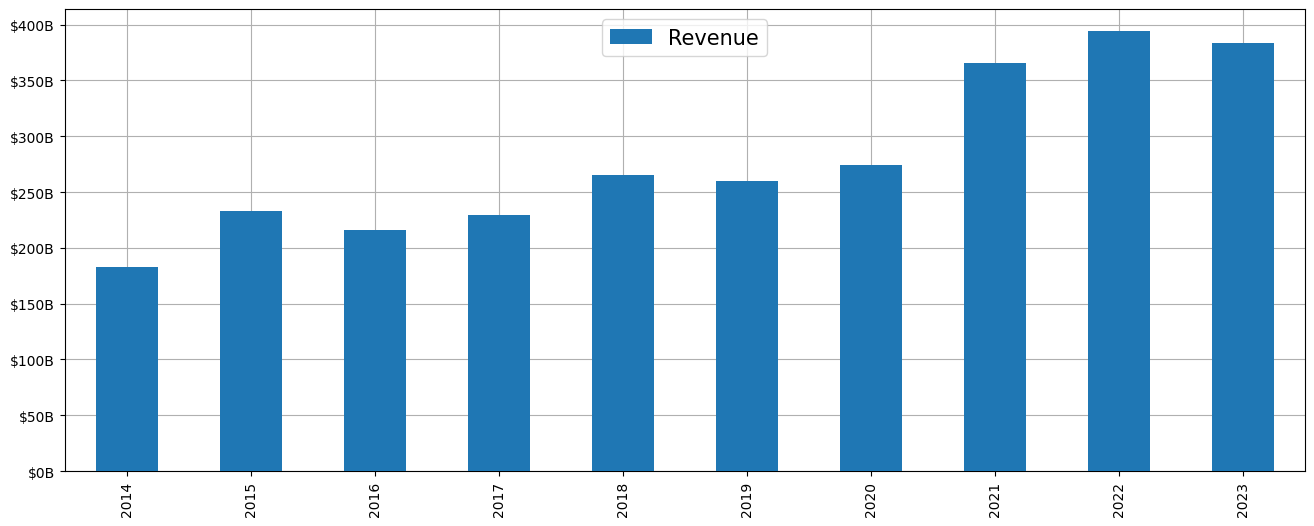

In [9]:
plot_report(annualReports, 'nonInterestIncome', 'Revenue')

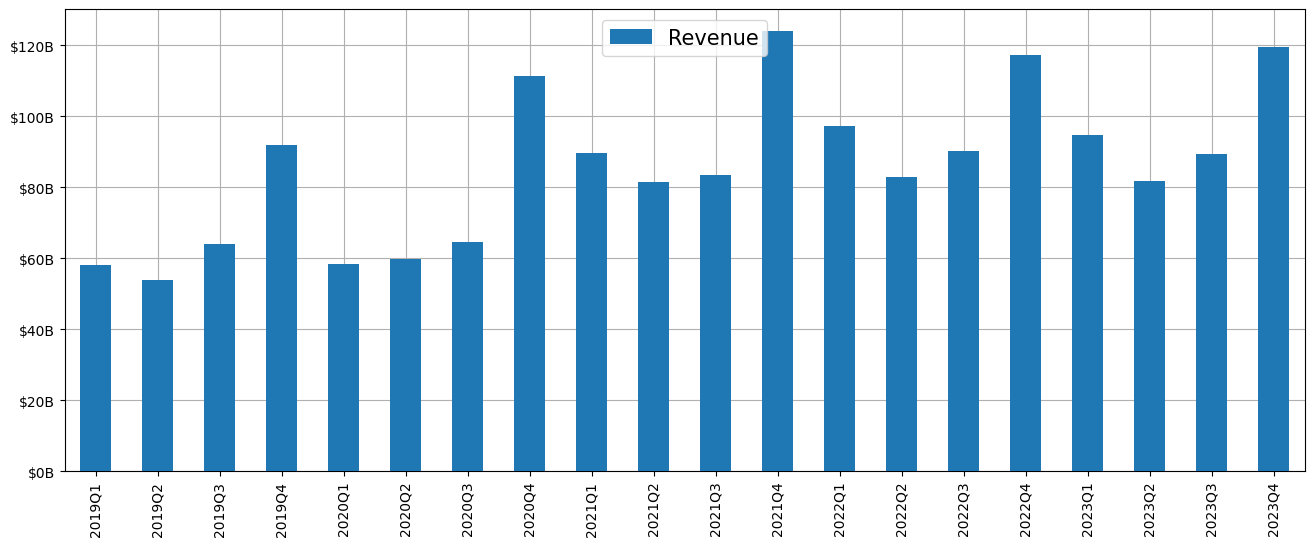

In [10]:
plot_report(quarterlyReports, 'nonInterestIncome', 'Revenue')

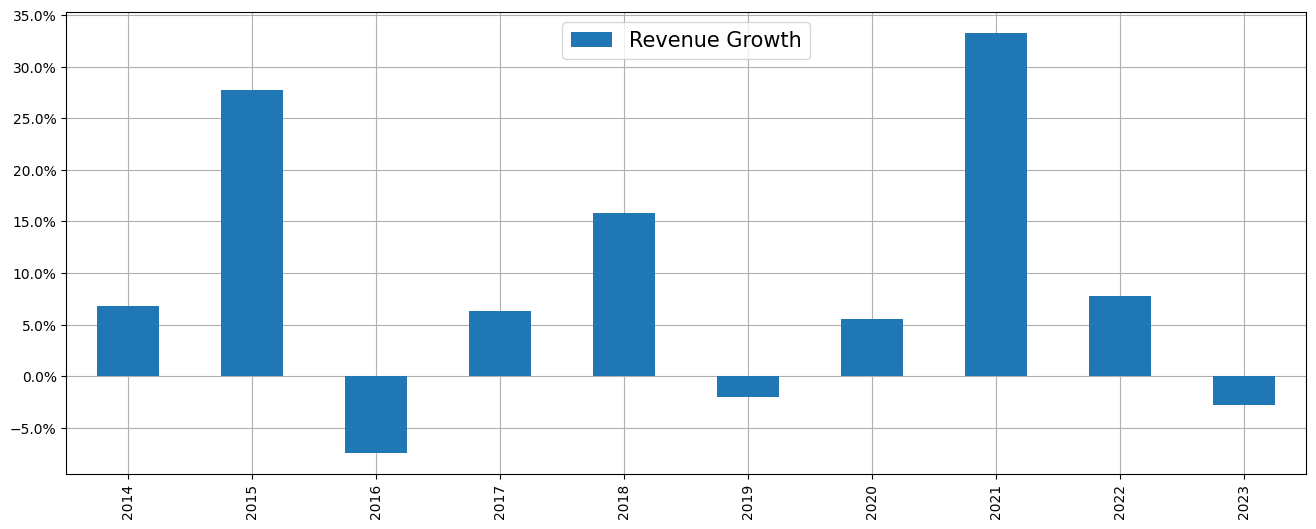

In [11]:
plot_report(annualReports, 'revenueYOYGrowth', 'Revenue Growth')

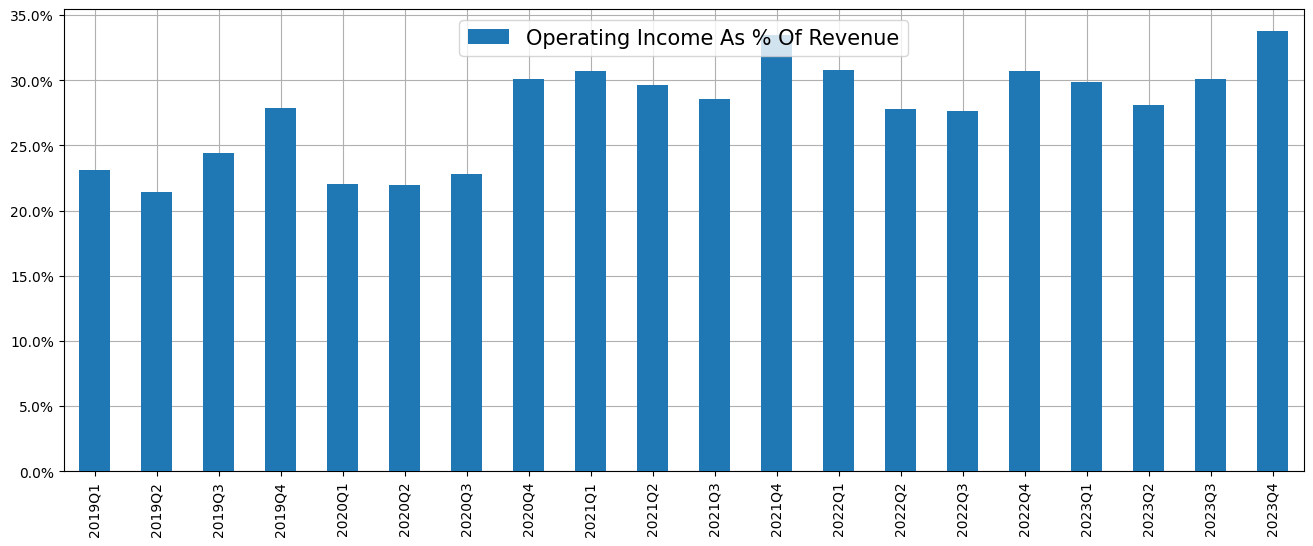

In [12]:
plot_report(quarterlyReports, 'operatingIncomeAs%OfRevenue', 'Operating Income As % Of Revenue')

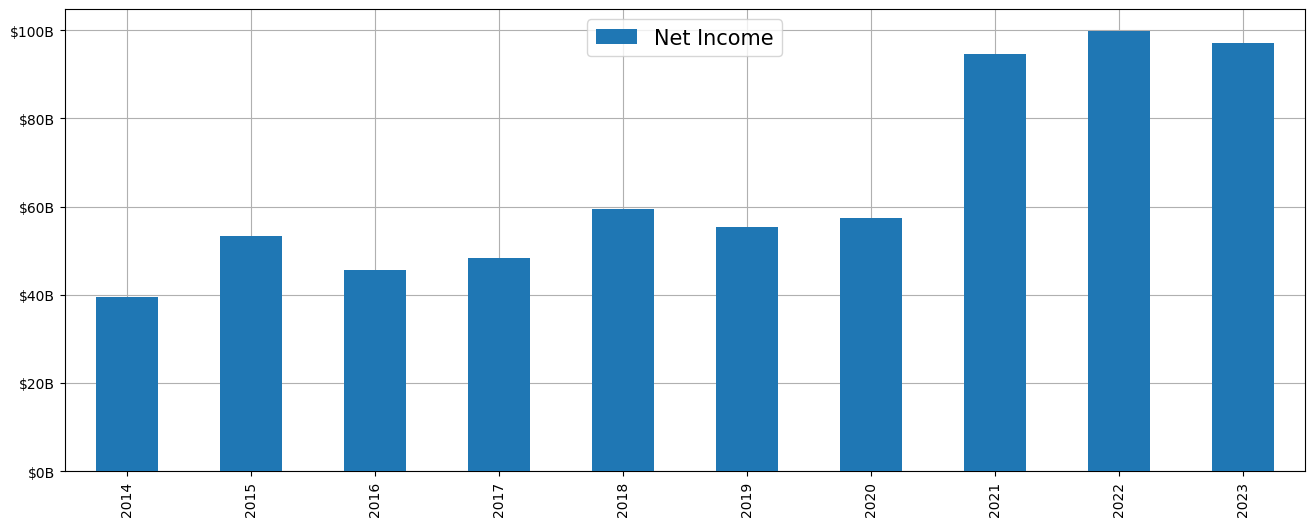

In [13]:
plot_report(annualReports, 'netIncome', 'Net Income')

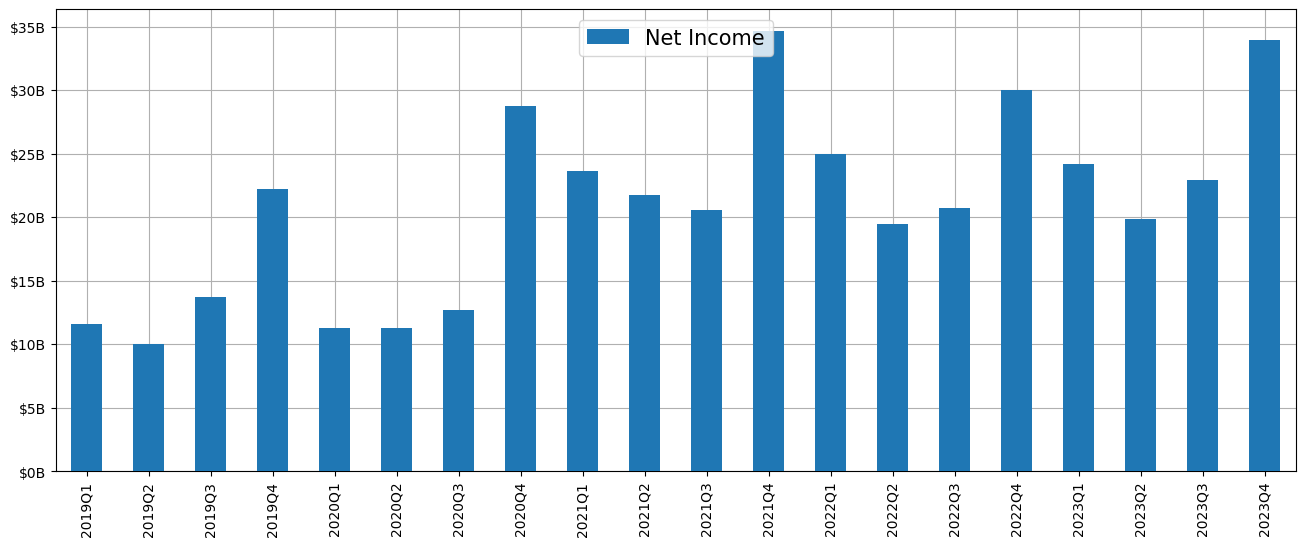

In [204]:
plot_report(quarterlyReports, 'netIncome', 'Net Income')